# Imports

In [1]:
#basic data analysis
import numpy as np
import pandas as pd

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import itertools #heatmap of categorical without repeats

#for Chi-Square
import scipy.stats as stats

#data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initial Look

Now let's import and take a look at the data:

In [2]:
#import the dataset
student_health = pd.read_csv("C:/Users/barbe/OneDrive/URI DS Program/577 Data Enabled Capstone/student_health_data.csv")

In [3]:
#look at first few instances
student_health.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


From looking at the first few instances, I can see that some variables are numerical and some are categorical. It also looks like Student_ID can be removed.

In [4]:
#check for missing values
print('Check for missing values:')
print(student_health.isna().sum(), '\n')

#check for duplicates
print('Check for duplicates: \n', student_health.duplicated().sum())

Check for missing values:
Student_ID                  0
Age                         0
Gender                      0
Heart_Rate                  0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Stress_Level_Biosensor      0
Stress_Level_Self_Report    0
Physical_Activity           0
Sleep_Quality               0
Mood                        0
Study_Hours                 0
Project_Hours               0
Health_Risk_Level           0
dtype: int64 

Check for duplicates: 
 0


No missing values and no duplicates. Let's go ahead and remove Student_ID.

In [5]:
student_health = student_health.drop(columns=["Student_ID"])

In [6]:
student_health.head()

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [7]:
#look at shape/dimension of dataset
print(student_health.shape)
#look at data types for each column
print(student_health.dtypes)

(1000, 13)
Age                           int64
Gender                       object
Heart_Rate                  float64
Blood_Pressure_Systolic     float64
Blood_Pressure_Diastolic    float64
Stress_Level_Biosensor      float64
Stress_Level_Self_Report    float64
Physical_Activity            object
Sleep_Quality                object
Mood                         object
Study_Hours                 float64
Project_Hours               float64
Health_Risk_Level            object
dtype: object


The dataset consists of numerical variables (integer and float) and object variables. Looking through, these object variables are really just categorical variables. So let's change the datatype from object to categorical.

In [8]:
#convert object variables to categorical variables
for col in student_health.select_dtypes(include = ['object']).columns:
    student_health[col] = student_health[col].astype('category')

#check data types
print(student_health.dtypes)

Age                            int64
Gender                      category
Heart_Rate                   float64
Blood_Pressure_Systolic      float64
Blood_Pressure_Diastolic     float64
Stress_Level_Biosensor       float64
Stress_Level_Self_Report     float64
Physical_Activity           category
Sleep_Quality               category
Mood                        category
Study_Hours                  float64
Project_Hours                float64
Health_Risk_Level           category
dtype: object


Now all objects are set as category. This will help with analyzing the data.

# Outlier Detection 

The next step is outlier detection. Let's begin by looking at the summary statistics.

In [9]:
#basic stats for numerical columns
student_health.describe()

,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


Items of note:
- We can see that some of the features are on different scales - we'll address this when preparing to model.
- There seems to be a relatively large jump from the 75th percentile value to the max value in some features, namely heart rate, blood pressure, and study/project hours. This may indicate outliers.
- The average and median heart rate and blood pressures are in line with establish norms. This suggests that the data accurately reflects the general population. 
    - https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
    - https://www.heart.org/en/health-topics/high-blood-pressure/the-facts-about-high-blood-pressure/all-about-heart-rate-pulse
- Slightly higher blood pressure and heart rate is relatively common, though the max values here indicate potentially serious health issues.

Let's investigate the spread of data more thoroughly.

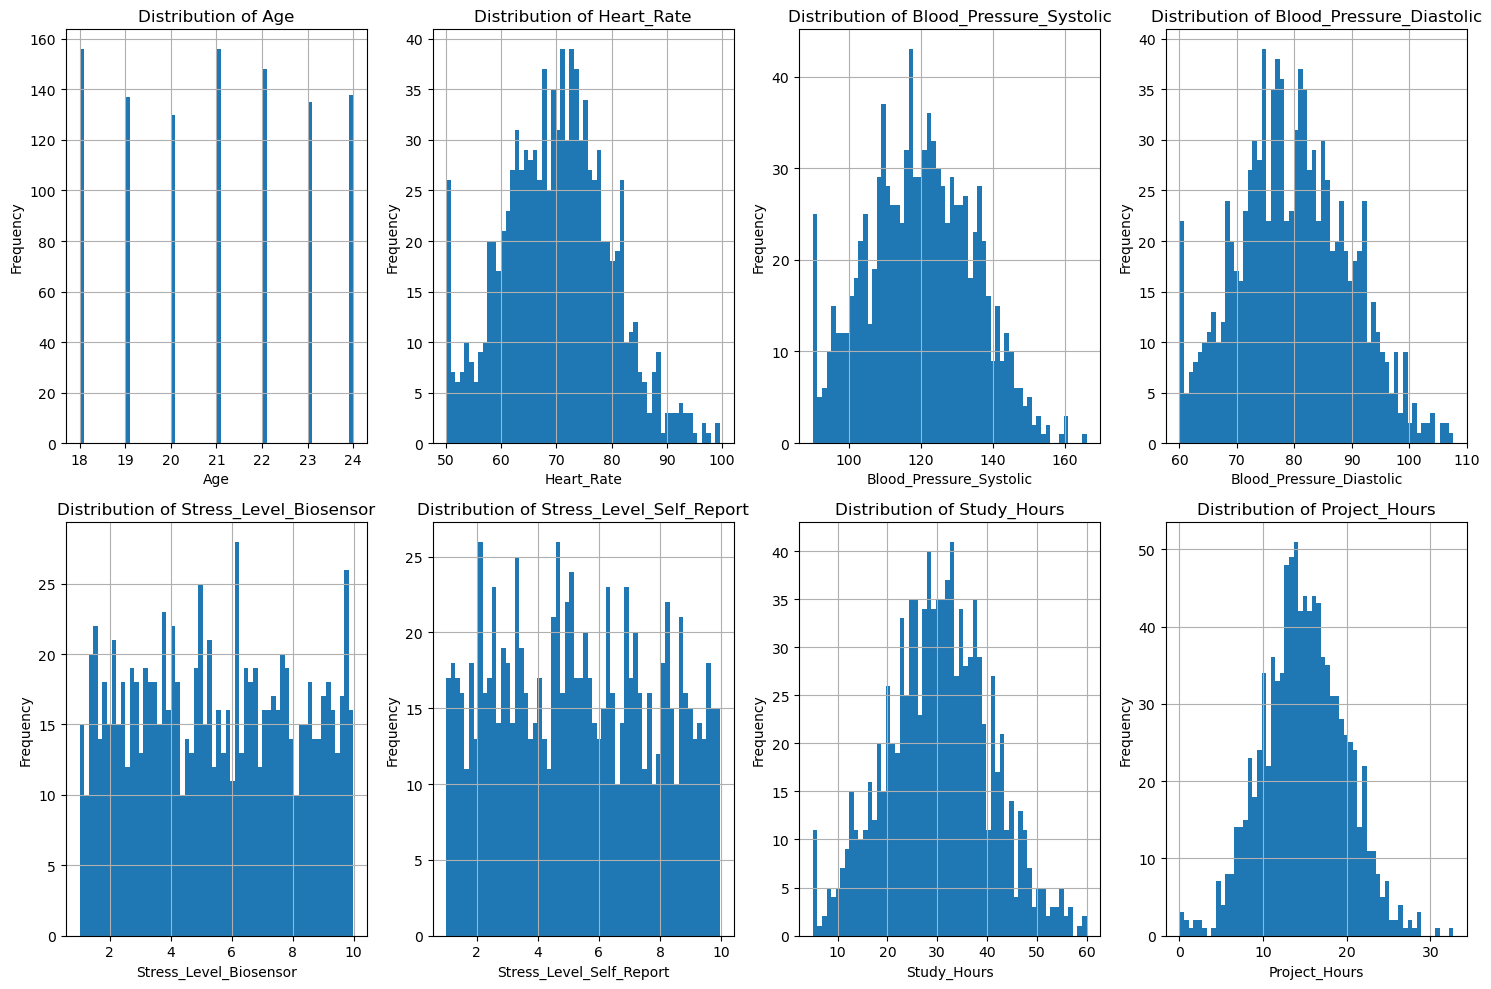

In [10]:
#list of numerical variables
numerical_var = ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                 'Stress_Level_Biosensor', 'Stress_Level_Self_Report', 'Study_Hours', 'Project_Hours']

# subplots set up
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 10)) 
axes = axes.flatten()


#histogram
#iterate over each numerical variable

i = 0 
for var in numerical_var:
    #plot a histogram for current variable
    student_health[var].hist(bins=60, ax = axes[i])
    #set title of the plot
    axes[i].set_title(f'Distribution of {var}')
    #label x-axis with variable name
    axes[i].set_xlabel(var)
    #label y-axis
    axes[i].set_ylabel('Frequency')
    i += 1

plt.tight_layout()
plt.show()

Items of Note:
- Age distribution is relatively uniform, suggesting a consistent number of students across the age range.
- Heart rate, blood pressure, and study/project hours follow a normal distribution.
- Stress levels appear uniform, indicating that students' stress levels are fairly evenly distributed. This also indicates consistent self-reported stress levels.

The tails further suggest potential outliers. Let's use boxplots to explicitly see if there are outliers.

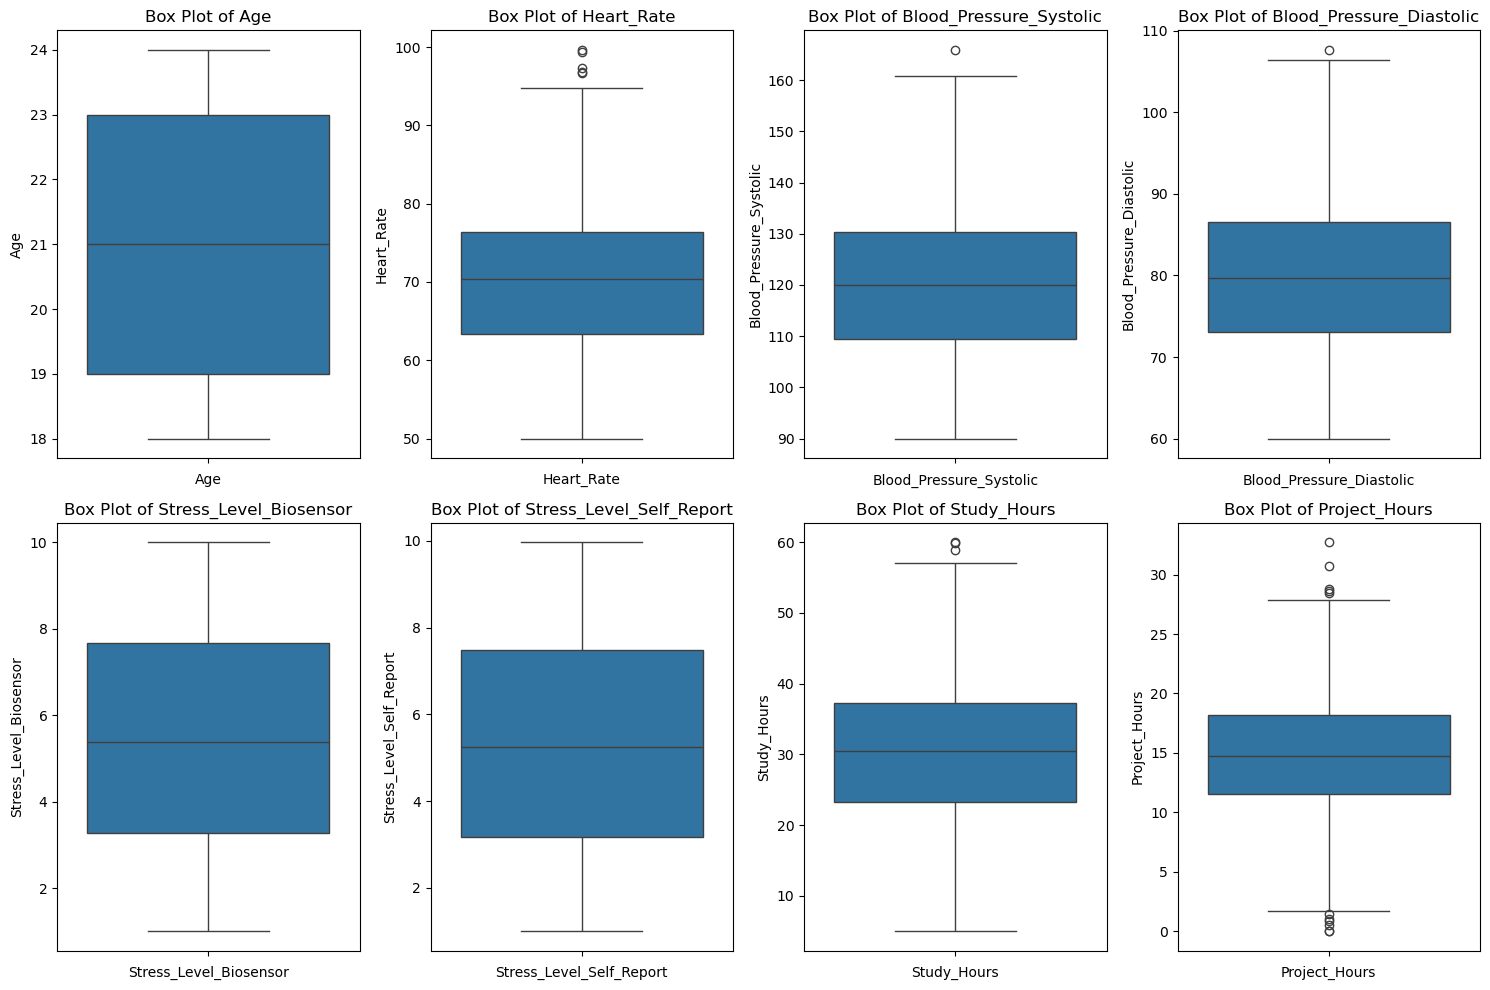

In [11]:
# subplots set up
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 10)) 
axes = axes.flatten()


#boxplot
#iterate through each numerical variable
i = 0
for var in numerical_var:
    #create boxplot for current variable
    sns.boxplot(y=student_health[var], ax = axes[i])
    #add title with variable name
    axes[i].set_title(f'Box Plot of {var}')
    #label x-axis with variable name
    axes[i].set_xlabel(var)
    i += 1
    
# Adjust layout
plt.tight_layout()
plt.show()

The histograms and boxplots verify outliers for Heart_Rate, Blood_Pressure_Systolic, Blood_Pressure_Diastolic, Study_Hours, and Project_Hours. It looks like Heart_Rate and Project_Hours hold the most outliers. Age, and stress levels don't have any outliers.

Using IQR, let's look at the instances with outliers.

In [12]:
#define function to identify outliers via IQR
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#create dataframe to store outliers
outliers_df = pd.DataFrame()

#apply function to numerical variables
#iterate over variables
for var in numerical_var:
    outliers = identify_outliers(student_health, var)
    #concatenate outliers to outlier dataframe
    outliers_df = pd.concat([outliers_df, outliers])

#drop duplicate rows since some rows may be outliers in multiple columns
outliers_df = outliers_df.drop_duplicates()

#display the outliers
outliers_df

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
198,19,M,99.650104,152.812332,81.798311,7.665972,4.733622,Moderate,Moderate,Neutral,41.520387,15.860464,Moderate
275,21,M,99.377528,98.811964,74.927286,6.611548,3.888419,Moderate,Moderate,Neutral,34.248981,11.354818,Moderate
769,24,F,96.631824,142.695139,63.073184,3.940650,3.479020,Moderate,Moderate,Happy,46.343832,22.940870,Low
941,22,M,96.875344,111.297845,69.414963,1.630618,6.891591,Moderate,Moderate,Stressed,19.422965,17.330091,Moderate
979,24,F,97.308672,135.537379,78.658548,8.664233,1.260971,High,Good,Happy,26.187293,13.899089,Moderate
899,18,F,50.000000,165.929204,77.116078,3.314371,6.006128,Moderate,Moderate,Happy,35.739767,25.310256,Moderate
439,19,F,66.932196,135.787934,107.659796,9.342168,1.262536,Moderate,Moderate,Neutral,27.308644,12.084991,Moderate
63,18,M,74.805621,113.068560,73.850496,9.185936,5.587814,Moderate,Moderate,Happy,59.863294,20.754383,Moderate
443,24,F,55.928560,90.000000,64.111815,3.508249,8.802469,Moderate,Poor,Stressed,60.000000,8.509177,Moderate
837,24,M,70.058106,129.669424,82.116004,2.518745,8.253731,Low,Poor,Happy,58.916587,13.646866,Moderate


In [13]:
#look at shape/dimension of dataset
outliers_df.shape

(21, 13)

Here is what I see looking at the outliers:
- Heart_Rate has 5 outliers, though it should be noted that they fall within the higher average heart rate (60-100). Stress levels, physical activities, and sleep quality can impact heart rate. High heart rates could be correlated to high stress, though this isn't always the case as we see in the 3rd instance. While most are labeled as moderate, it's crucial to consider if other factors contribute to this rating.
- Blood_Pressure_Systolic has 1 outlier. This is much higher than the norm, indicating potential hypertension. While marked as moderate health risk, considering the high blood pressure, other factors like stress level and physical activity could play a role.
- Blood_Pressure_Diastolic also has 1 outlier, which is significantly high. Similar to systolic, other lifestyle factors may contribute the the risk level.
- Stress levels don't seem to hold any outliers.
- Study_Hours have 3 outliers. These students study much longer compared to other students. Poor sleep quality and varying moods indicate that excessive study hours could negatively impact their well-being. The risk level is moderate, suggesting that while these students manage stress, the high study hours could eventually lead to burnout or other issues.
- Project_Hours have 11 outliers. We see that some students spend a lot of hours on projects and others don't spend much time at all. While most instances are labeled as moderate, one is marked as high. This indicates that high project hours could correlate with increased health risks, especially when paired with other factors like sleep quality and stress levels.

Only 21 instance were considered to have outliers. Realistically, we can remove these and still have plenty of data to work with since the original dataset contains 1000 instances. With that in mind, let's go ahead and remove the instances with outliers.

In [14]:
#get outlier indices
outlier_indices = outliers_df.index

#drop rows in dataset with outlier indices
cleaned_df = student_health.drop(outlier_indices)

#look at dimension of dataset
print(cleaned_df.shape)

(979, 13)


In [15]:
#look at basic stats
cleaned_df.describe()

,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,20.954035,69.979106,119.788093,79.890649,5.493225,5.356630,30.077246,14.885170
std,1.997169,9.367907,14.482425,9.615105,2.593141,2.552939,10.265443,4.660111
min,18.000000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,1.729188
25%,19.000000,63.307344,109.383136,73.103106,3.294550,3.152128,23.172107,11.646913
50%,21.000000,70.304789,120.061395,79.726681,5.401436,5.232666,30.314270,14.768098
75%,23.000000,76.343322,130.365350,86.548586,7.674901,7.474922,37.189126,18.106878
max,24.000000,94.722795,160.739199,106.450368,9.994153,9.964115,57.136198,27.885272


Looks like we successfully removed all outliers!

# Correlation

### Numerical

We'll begin by looking at correlations between numerical variables.

In [16]:
#calculate Pearson Correlation Matrix
pearson_corr = cleaned_df[numerical_var].corr(method='pearson')
pearson_corr

,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
Age,1.000000,0.014115,-0.008258,0.008855,0.043984,0.016734,-0.078618,-0.000572
Heart_Rate,0.014115,1.000000,0.002642,-0.021330,0.039858,-0.017568,0.041596,-0.000839
Blood_Pressure_Systolic,-0.008258,0.002642,1.000000,0.015759,-0.033959,-0.011818,-0.004928,-0.048204
Blood_Pressure_Diastolic,0.008855,-0.021330,0.015759,1.000000,-0.011212,-0.008532,0.001248,-0.012685
Stress_Level_Biosensor,0.043984,0.039858,-0.033959,-0.011212,1.000000,-0.016057,-0.028816,0.001118
Stress_Level_Self_Report,0.016734,-0.017568,-0.011818,-0.008532,-0.016057,1.000000,-0.010993,0.016558
Study_Hours,-0.078618,0.041596,-0.004928,0.001248,-0.028816,-0.010993,1.000000,-0.036473
Project_Hours,-0.000572,-0.000839,-0.048204,-0.012685,0.001118,0.016558,-0.036473,1.000000


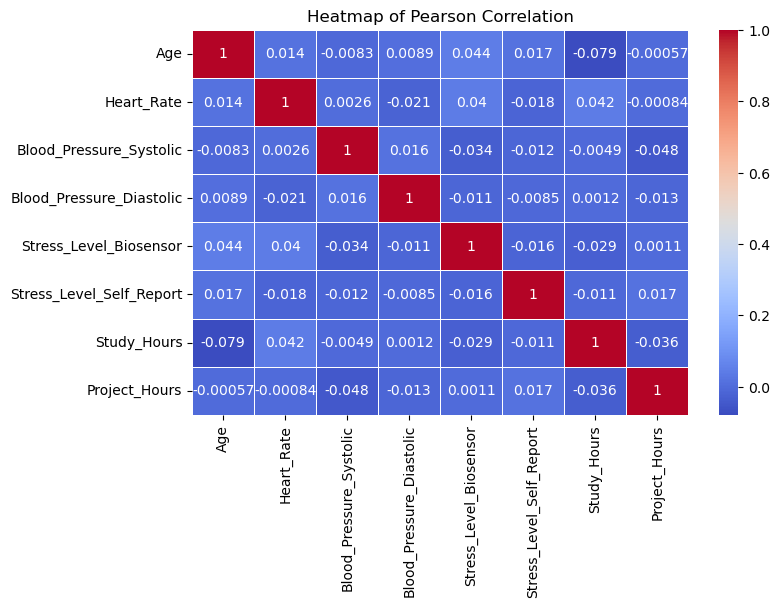

In [17]:
#heatmap of Pearson correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Pearson Correlation')
plt.show()

Pearson correlation shows no that no numerical features are correlated. With that said, Pearson Correlation can't capture nonlinear relationships. We'll further analyze numerical correlation with Spearman's Rank Correlation.

In [18]:
#calculate Spearman's Rank Correlation Matric
spearman_corr = cleaned_df[numerical_var].corr(method='spearman')
spearman_corr

,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
Age,1.000000,0.010718,-0.004715,0.001238,0.044051,0.015880,-0.079549,0.004606
Heart_Rate,0.010718,1.000000,0.010531,-0.008705,0.052829,-0.022482,0.036688,0.000002
Blood_Pressure_Systolic,-0.004715,0.010531,1.000000,0.013235,-0.034453,-0.010599,-0.006829,-0.037278
Blood_Pressure_Diastolic,0.001238,-0.008705,0.013235,1.000000,-0.017856,-0.000378,0.001954,-0.022251
Stress_Level_Biosensor,0.044051,0.052829,-0.034453,-0.017856,1.000000,-0.016621,-0.031668,-0.001035
Stress_Level_Self_Report,0.015880,-0.022482,-0.010599,-0.000378,-0.016621,1.000000,-0.010669,0.013275
Study_Hours,-0.079549,0.036688,-0.006829,0.001954,-0.031668,-0.010669,1.000000,-0.039752
Project_Hours,0.004606,0.000002,-0.037278,-0.022251,-0.001035,0.013275,-0.039752,1.000000


Again, we find that no numerical features are correlated. To ensure a thorough investigation, let's visualize correlations by viewing scatterplots for every pair of numerical features.

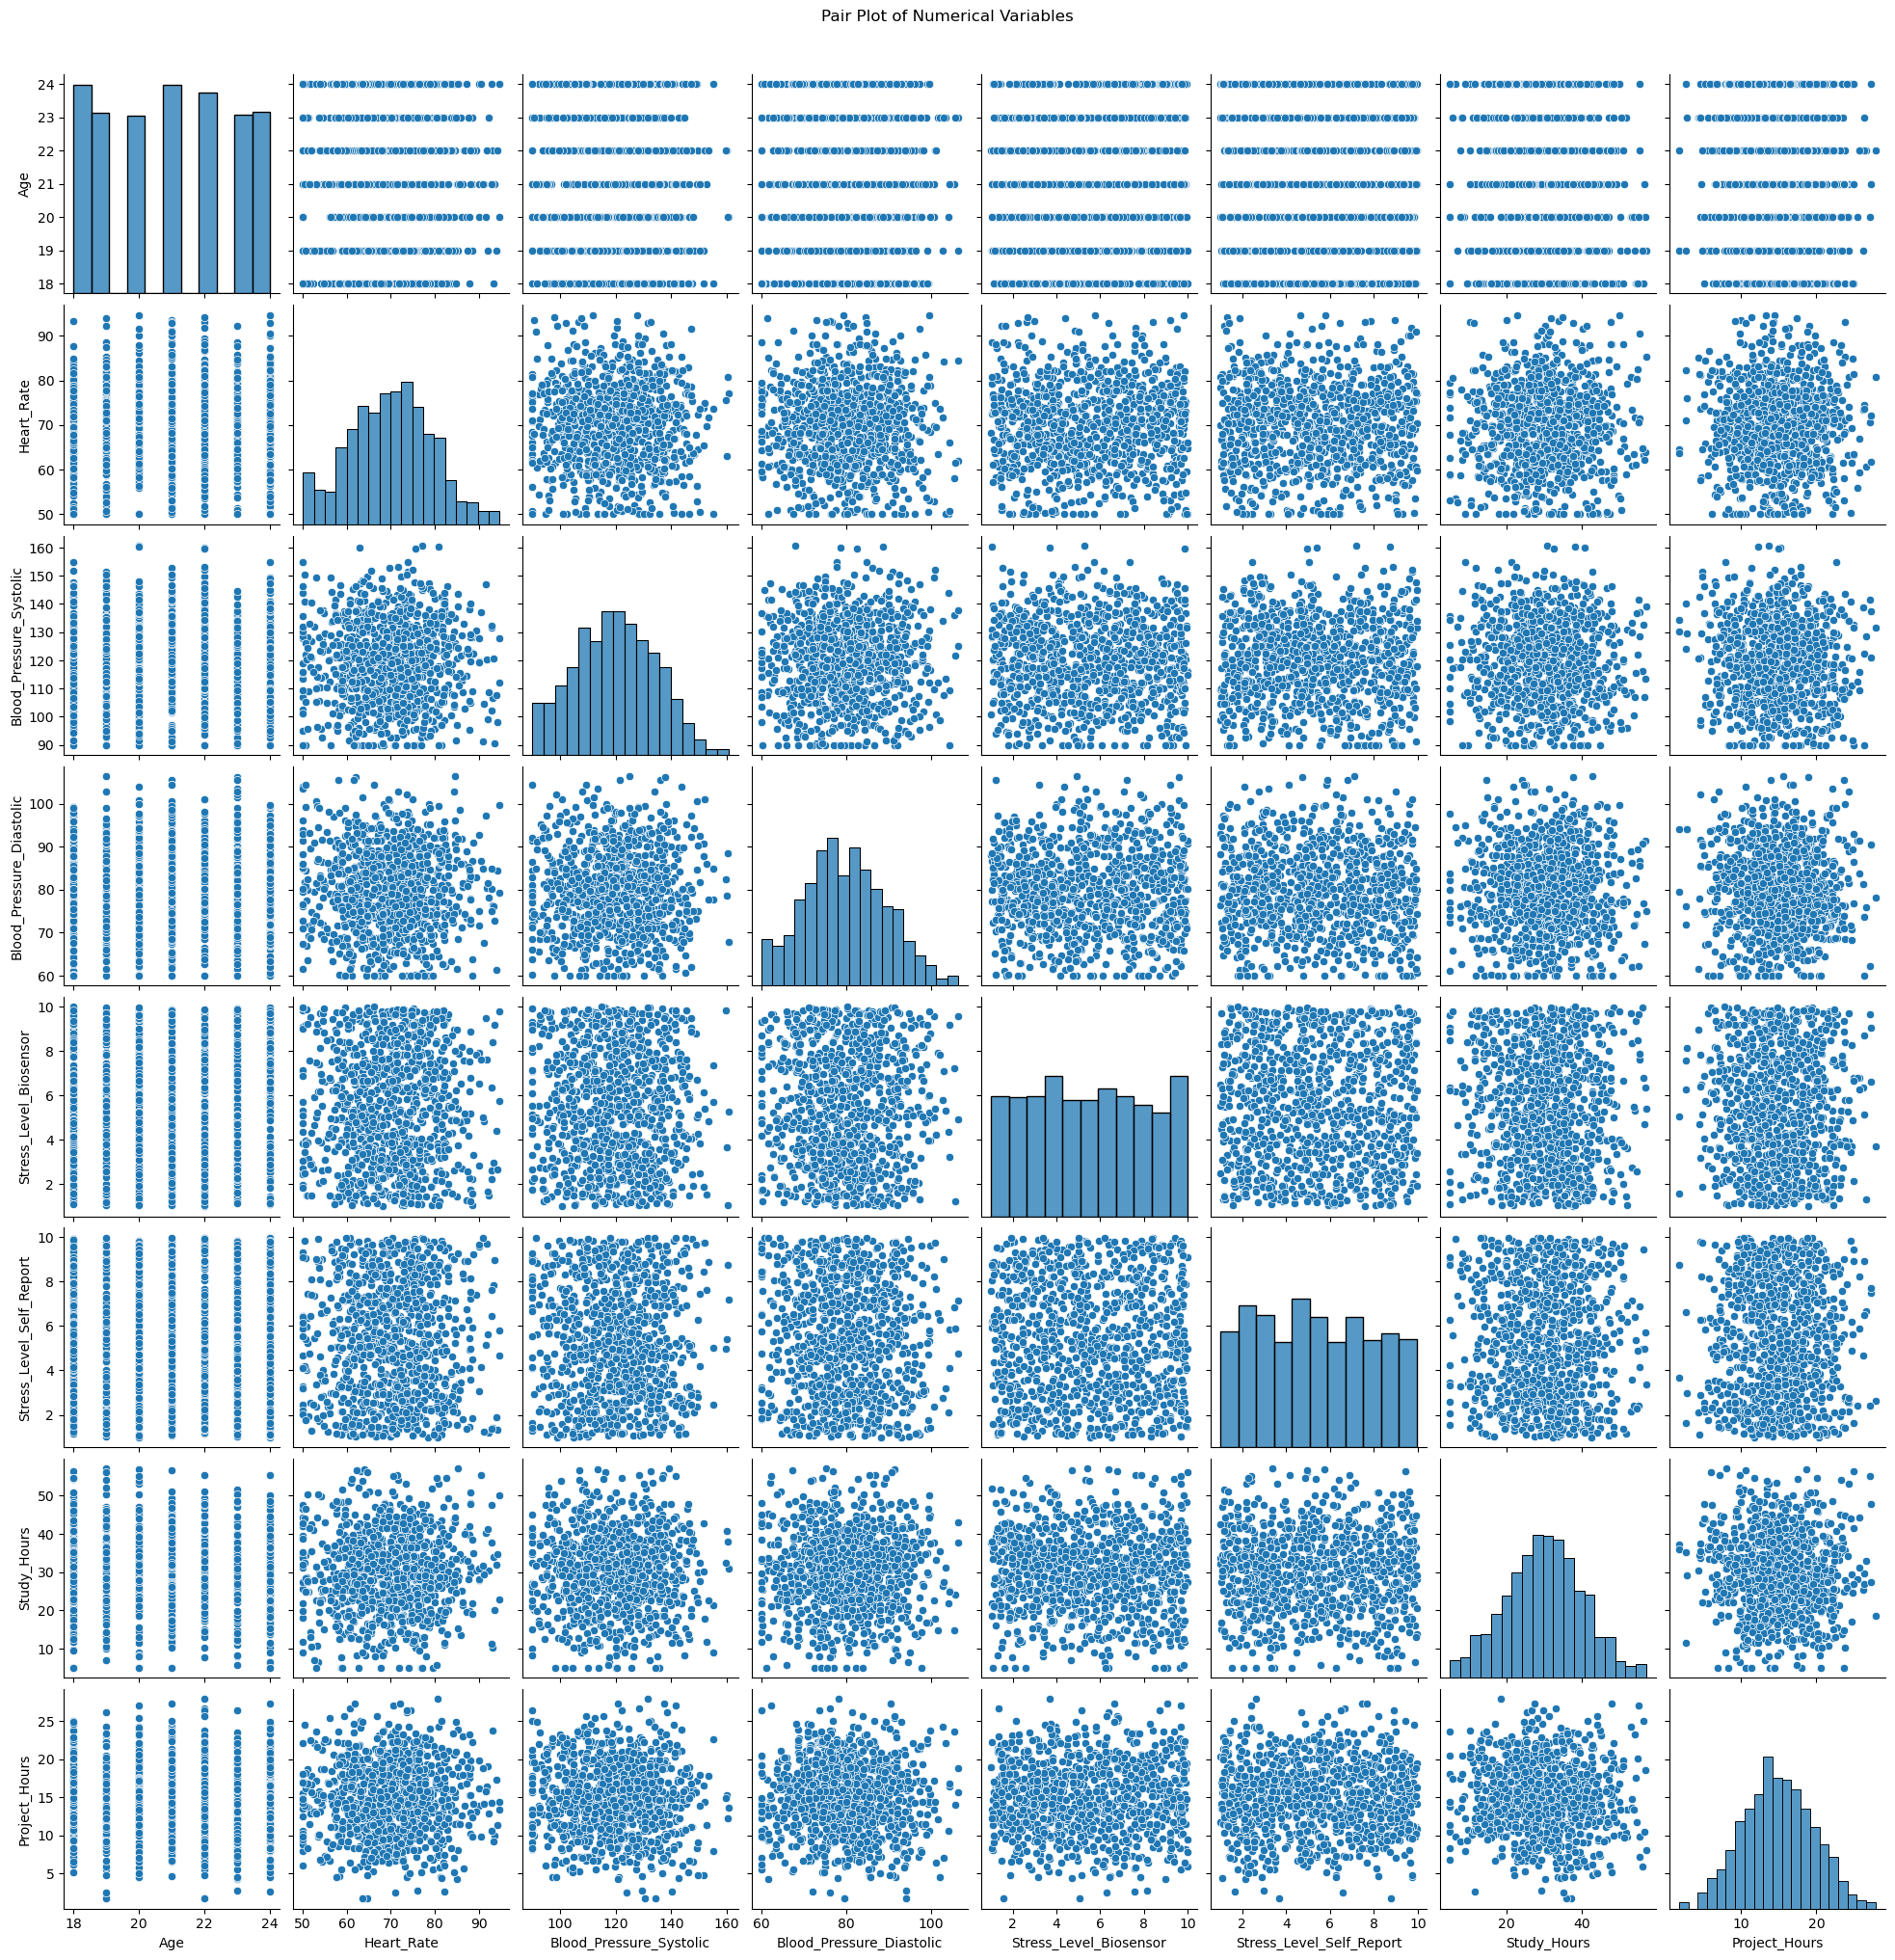

In [19]:
#pair plot
sns.pairplot(cleaned_df[numerical_var])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

The visualization supports our findings. 

Implications:
- This simplifies our analysis since we don't have to account for interdependencies between variables.
- This might lead to unique information to our predictive models. This could also improve the model's ability to capture diverse patterns in the data.
- Algorithms such as Random Forest and Gradient Boosting can help identify the importance of each feature without being affected by multicollinearity.

The last thing to check out now is to see how the numerical features correlate to the target variable.

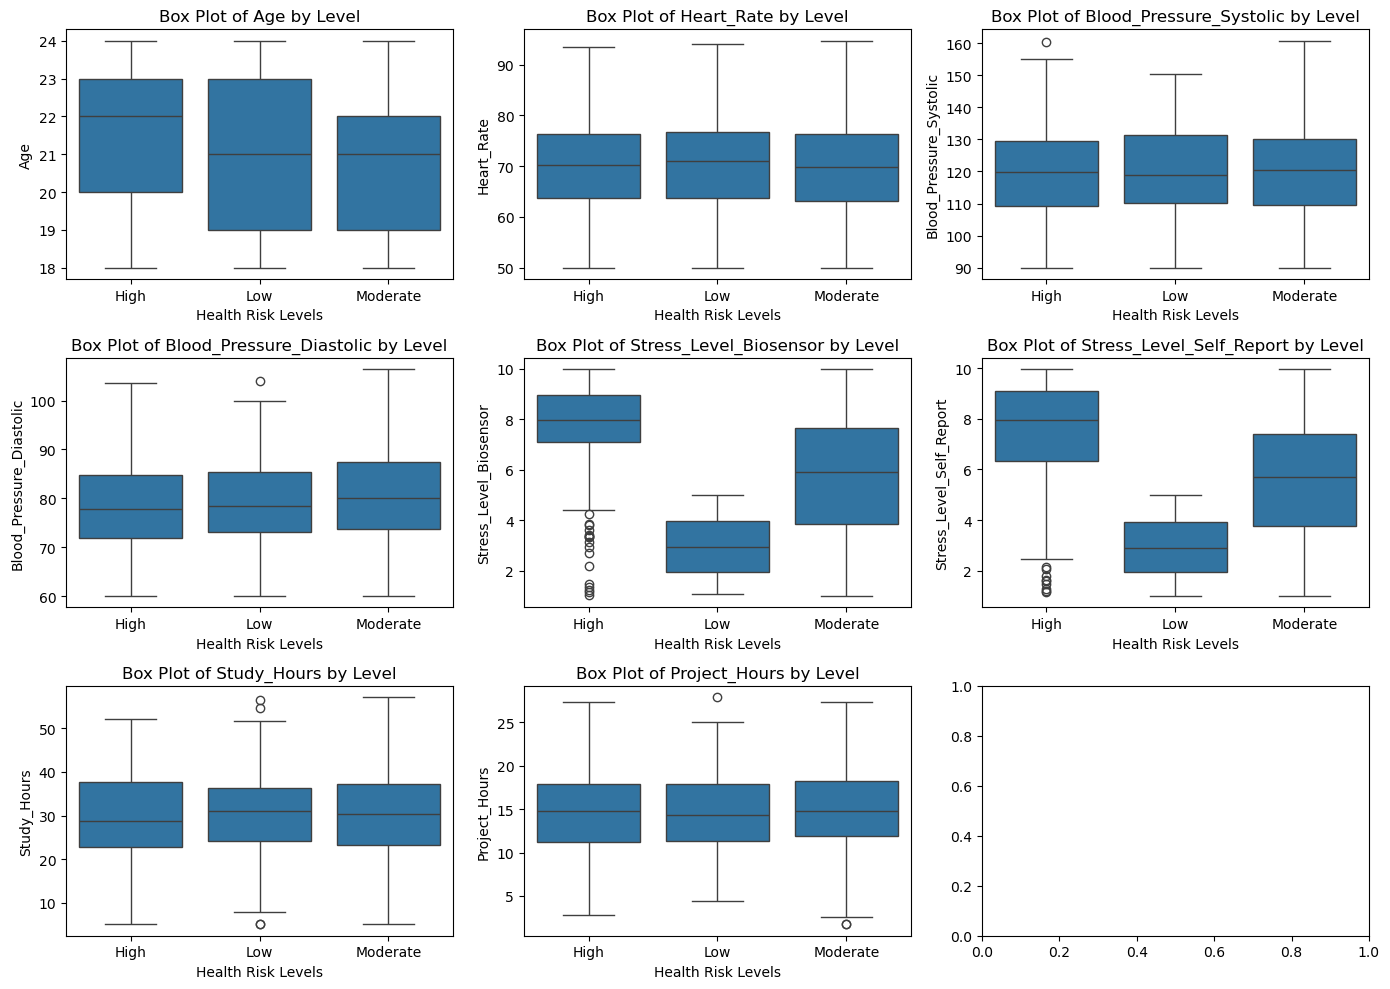

In [20]:
# subplots set up
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(14, 10)) 
axes = axes.flatten()


# Create Box Plots
i = 0
for var in numerical_var:

    #create boxplot for each numerical variable grouped by the target variable
    sns.boxplot(x=cleaned_df['Health_Risk_Level'], 
                y=cleaned_df[var], 
               ax = axes[i])
    axes[i].set_title(f'Box Plot of {var} by Level')
    axes[i].set_xlabel('Health Risk Levels')
    axes[i].set_ylabel(var)
    i += 1
    
    
plt.tight_layout()
plt.show()

Here is what I've noted:
- The median age for high risk level is higher compared to moderate and low, in which they (moderate and low) have similar medians. This difference suggests there may be a correlation between Age and Health_Risk_Levels.
    - The longer box between Age and Low suggests a wider age range among individuals with low health risk, indicating more variability in ages within this group. The shorter boxes for High and Moderate suggests less variability in ages among individuals in those risk levels.
- Median Heat_Rate is similar for all risk levels. The boxes are all relatively short, indicating low variability.
- Median blood pressure is similar across all risk levels.
- Median stress levels vary greatly beyween risk levels. Median stress level is much higher in the high risk category, then in moderate, then low for both types of stress levels. We also see quite a bit of outliers in the High risk level. These large differences suggests a relationship between stress levels and health risk levels.
    - It should also be noted that there are quite a bit of outliers, particularly in the High risk level.
- Median study hours is relatively consistent across risk levels. Similar can be said about project hours.

### Categorical

Now, let's look at the categorical variable in more detail.

In [21]:
#look at value counts for non-numerical columns

#create vector for non-numeric columns
obj_var = ['Gender', 'Physical_Activity', 'Sleep_Quality', 'Mood', 'Health_Risk_Level']

#iterate through each variable and print
for i in obj_var:
    print(cleaned_df[i].value_counts(), '\n')

Gender
M    506
F    473
Name: count, dtype: int64 

Physical_Activity
Moderate    475
Low         299
High        205
Name: count, dtype: int64 

Sleep_Quality
Good        467
Moderate    308
Poor        204
Name: count, dtype: int64 

Mood
Neutral     406
Happy       390
Stressed    183
Name: count, dtype: int64 

Health_Risk_Level
Moderate    656
Low         186
High        137
Name: count, dtype: int64 



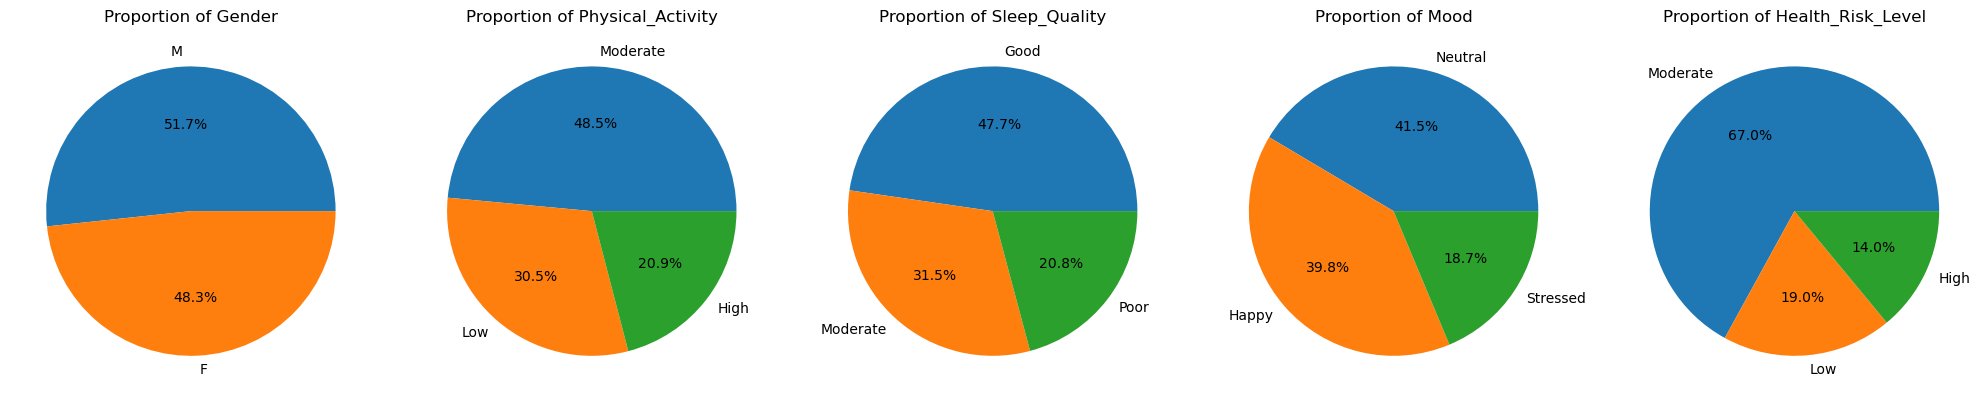

In [22]:
#pie chart to visualize category distribution

#create subplots: a grid of plots, one for each variable
fig, axes = plt.subplots(1, len(obj_var), figsize=(20, 5))

#loop through each variable in the list
for idx, var in enumerate(obj_var):
    cleaned_df[var].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[idx])
    axes[idx].set_title(f'Proportion of {var}')
    axes[idx].set_ylabel('')  #remove y-axis label for cleaner look

plt.tight_layout()
plt.show()

Items of note:
- The gender distribution is fairly balanced, with only slightly more males. This ensures that gender-based analyses can be conducted without significant bias.
- Most students engage in moderate physical activity, with fewer participating in high or low activity. This suggests a potential area of intervention to increase physical activity levels among students.
- While many student report good sleep quality, a significant  number experience moderate or poor sleep. This could impact their overall well-being and academic performance, highlighting the need for sleep improvement initiatives.
- The majority of students reported happy or neutral moods, with a smaller proportion feeling stressed. Understanding factors contributing to stress can help in providing better mental health support.
- The majority of students are classified as moderate health risk, with fewer in low and even less in high. This distribution can help focus health interventions on those in the moderate and high risk groups.

Next step is to check correlation between categorical variables.

In [23]:
#function to calculate Chi-Square p-value
def chi_square_test(x, y):
    #create contigency table from the two variables
    contingency_table = pd.crosstab(x, y)
    #perform Ch-Square Test for independence
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    #return p-value
    return p

#loop through unique pairs of variables
for i in range(len(obj_var)):
    for j in range(i + 1, len(obj_var)):
        #select the two variables for the current pair
        var1 = obj_var[i]
        var2 = obj_var[j]

        #calculate Chi-Square p-value
        p_value = chi_square_test(cleaned_df[var1], cleaned_df[var2])
        print(f'Chi-Square p-value for {var1} and {var2}: {p_value}')

Chi-Square p-value for Gender and Physical_Activity: 0.034586142078450614
Chi-Square p-value for Gender and Sleep_Quality: 0.015100291529196634
Chi-Square p-value for Gender and Mood: 0.44263321443120285
Chi-Square p-value for Gender and Health_Risk_Level: 0.5580824884585867
Chi-Square p-value for Physical_Activity and Sleep_Quality: 0.8204041135148793
Chi-Square p-value for Physical_Activity and Mood: 0.6261103118512352
Chi-Square p-value for Physical_Activity and Health_Risk_Level: 1.930445735375106e-16
Chi-Square p-value for Sleep_Quality and Mood: 0.8950487122842119
Chi-Square p-value for Sleep_Quality and Health_Risk_Level: 6.440596238339458e-10
Chi-Square p-value for Mood and Health_Risk_Level: 0.26315918913566794


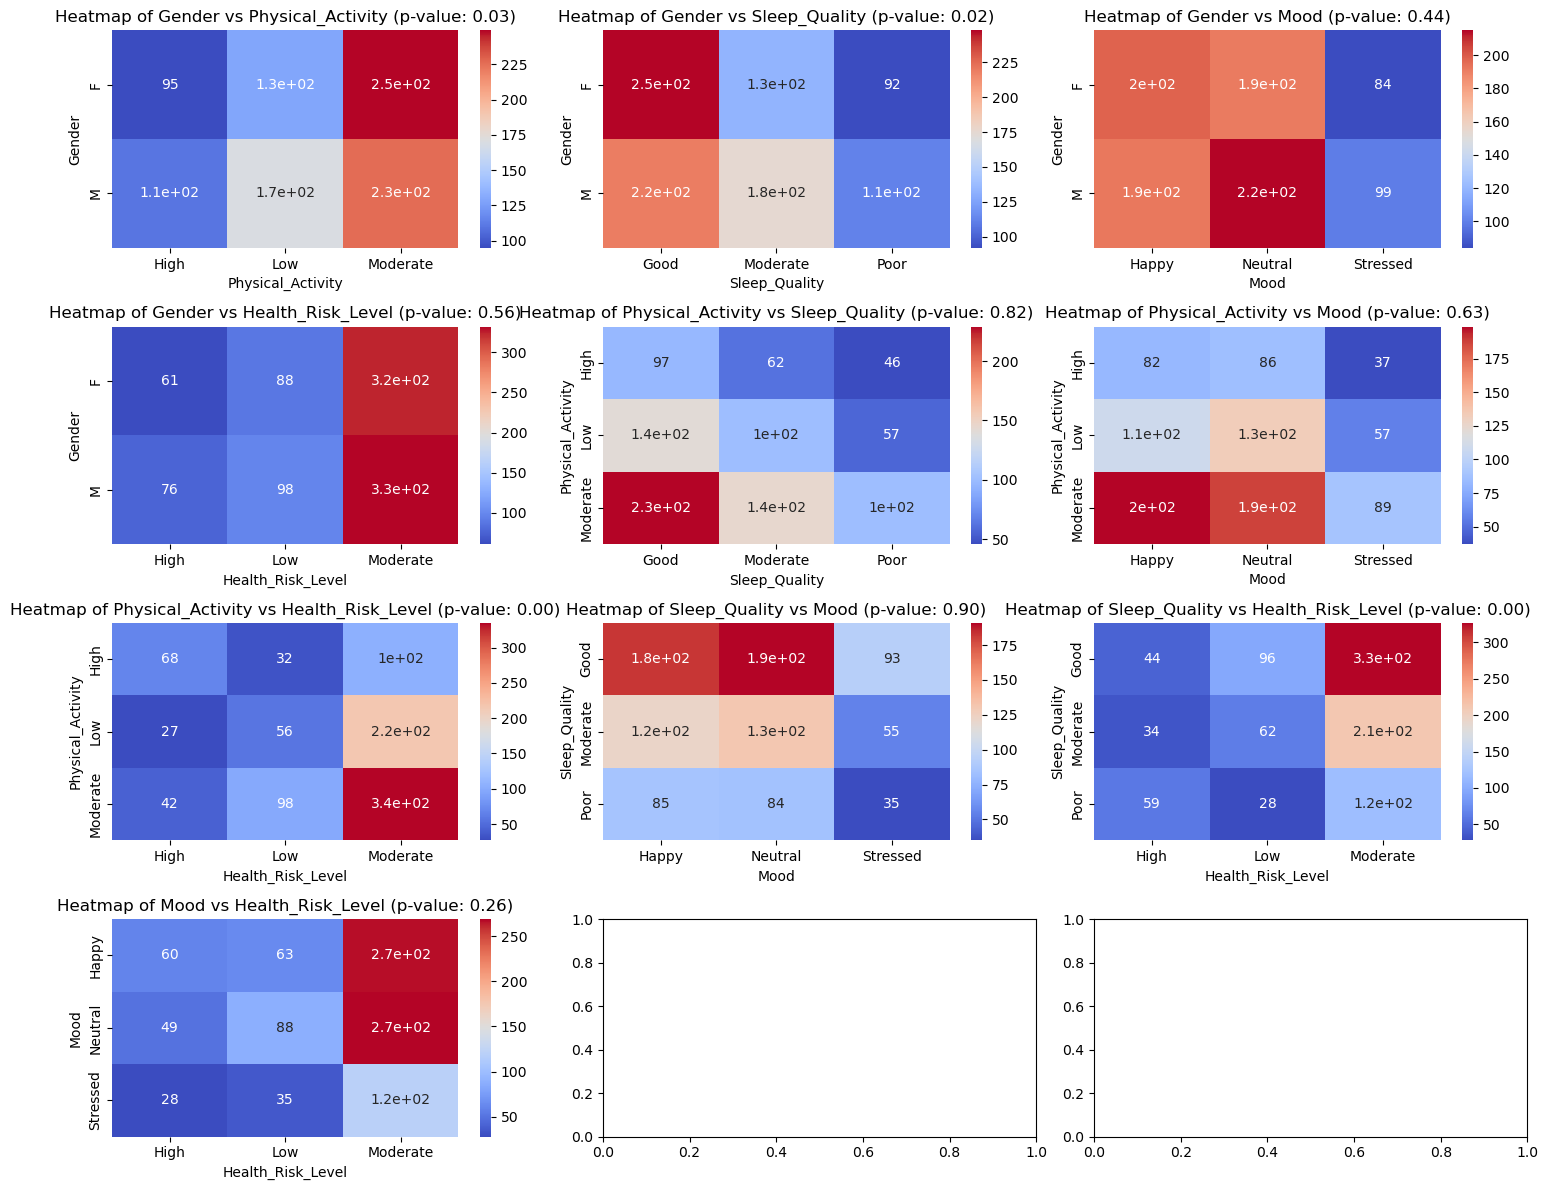

In [24]:
#Heatmap comparing each of the categorical variables to each other
#These heatmaps will visualize the frequency of occurrences for each pair of variable levels

#plotting heatmaps with p-values as annotations
rows = 4
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12)) 
axes = axes.flatten()

k = 0
for i in range(len(obj_var)):  #iterates over list of variables from beginning to end
    for j in range(i + 1, len(obj_var)):  #ensures each pair is only visualized once
        var1 = obj_var[i]
        var2 = obj_var[j]
        
        #create a crosstab
        crosstab = pd.crosstab(cleaned_df[var1], cleaned_df[var2])
        
        #calculate Chi-Square p-value
        p_value = chi_square_test(cleaned_df[var1], cleaned_df[var2])
        
        #plot the heatmap
        sns.heatmap(crosstab, annot=True, cmap='coolwarm', ax=axes[k])
        axes[k].set_title(f'Heatmap of {var1} vs {var2} (p-value: {p_value:.2f})')
        k += 1
        
plt.tight_layout()
plt.show()

Interpretation of Chi-Square p-value: if the p-value is < 0.05, it suggests there is a statistically significant association between the two variables. If > 0.05, it indicates that observed association is likely due to chance.

Looking at the p-values, we can see that there are correlations between:
- Gender and Physical_Activity
- Gender and Sleep_Quality
- Physical_Activity and Health_Risk_Level
- Sleep_Quality and Health_Risk_Level

Insights:
- Gender has significant associations with physical activity and sleep quality. Tailored interventions focusing on these factors may be beneficial.
- There is a strong link between physical activity and health risk level. Promoting physical activity can significantly reduce health risks.
- Good sleep quality is strongly associated with health risk levels. Programs improving sleep quality can enhance overall health.

Note that the heatmaps visualize the frequency of occurrences for each pair of variable levels. As the occurrences increase, the color becomes a darker shade of red. These can be used to identify potential associations or patterns between the variables, but show no correlations or statistical significance.

# Getting Ready to Model

#### Split the data

First we separate the our features and target variable into a feature matrix and a target vector.

In [25]:
#define feature matrix and target vector
X = cleaned_df.drop(columns = ["Health_Risk_Level"])
y = cleaned_df["Health_Risk_Level"]

In [26]:
#check sizes
print(f'cleaned_df size: {cleaned_df.shape}')
print(f'feature matrix size: {X.shape}')
print(f'target vector size: {y.shape}')

cleaned_df size: (979, 13)
feature matrix size: (979, 12)
target vector size: (979,)


In [27]:
X.head()

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours
0,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956
1,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154
2,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437
3,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391
4,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045


Next step is to split the data into a training set (80%), and validation set for hyperparameter tuning (10%) and a test set for a final model performance (10%). Since we have class imbalance in the target variable, we want to make sure that each target split contains the same distribution of classes.

In [28]:
#split data into a training set and a temp set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 12)

#split the temp set into a validation set and final test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, stratify = y_temp, random_state = 12)

Now to ensure that that the split occurred as desired. First we check the sizes of our feature sets

In [29]:
#check number of instances in each split
print(f"Training set size: {X_train.shape[0]}") #X_train.shape[0] gives the number of rows in the trainin set
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 783
Validation set size: 98
Test set size: 98


In [30]:
print(783/979)
print(98/979)

0.7997957099080695
0.10010214504596528


Next, we ensure that each target variable has the same distribution.

In [31]:
#print class distribution as percent
print("Class distribution in Training Set:") #training set
print(y_train.value_counts(normalize=True))  #normalized (percentages)

print("\nClass distribution in Validation Set:") #validation set
print(y_val.value_counts(normalize=True))

print("\nClass distribution in Test Set:") #test set
print(y_test.value_counts(normalize=True))

Class distribution in Training Set:
Health_Risk_Level
Moderate    0.670498
Low         0.190294
High        0.139208
Name: proportion, dtype: float64

Class distribution in Validation Set:
Health_Risk_Level
Moderate    0.663265
Low         0.193878
High        0.142857
Name: proportion, dtype: float64

Class distribution in Test Set:
Health_Risk_Level
Moderate    0.673469
Low         0.183673
High        0.142857
Name: proportion, dtype: float64


It looks like the data has been split relatively evenly, retaining the distribution of categories quite well.

#### Preprocess the data

Now that the data has been split, let's go ahead and preprocess it. We begin by encoding the categorical data, then scaling using a standard scaler.
- It should be noted that tree-based models don't require as much preprocessing, but to ensure consistency across different models (tree-based, KNN, SVM), it's simpler to preprocess the data once and use the preprocessed data for all models.
- LabelEncoder converts each category into a unique integer. This is preferred for the target variable.
- pd.get_dummies is used for one-hot encoding. This is preferred for categorical features.
- Aligning ensures all datasets have the same features.

In [32]:
#encode categorical features - uses one-hot encoding
#allows the models to interpret each category as a distinct entity - preferred for KNN and SVM
X_train_encode = pd.get_dummies(X_train)
X_val_encode = pd.get_dummies(X_val)
X_test_encode = pd.get_dummies(X_test)

#align validation and test sets with training set - ensures same columns
X_val_encode = X_val_encode.reindex(columns = X_train_encode.columns, fill_value = 0)
X_test_encode = X_test_encode.reindex(columns = X_train_encode.columns, fill_value = 0)

#initialize and fit scaler on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encode)

#transform validation and test data
X_val_scaled = scaler.transform(X_val_encode)
X_test_scaled = scaler.transform(X_test_encode)

#manually set class order
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(["Low", "Moderate", "High"])  #custom order

#encode labels - this method is preferrred for target as it assigns a unique integer to each class
y_train_encode = label_encoder.transform(y_train)
y_val_encode = label_encoder.transform(y_val)
y_test_encode = label_encoder.transform(y_test)

#check mapping
label_mapping = dict(enumerate(label_encoder.classes_))
print("Label Encoding Mapping:", label_mapping)

#rename matrices and vectors for ease of use - could  be done better, but didn't want to overwrite previous train, val, and test
X_train2 = X_train_scaled
X_val2 = X_val_scaled
X_test2 = X_test_scaled

y_train2 = y_train_encode
y_val2 = y_val_encode
y_test2 = y_test_encode

Label Encoding Mapping: {0: 'Low', 1: 'Moderate', 2: 'High'}


# Conclusions

## Exploratory Data Analysis

**Initial Look and Data Preparation**

The initial assessment of the dataset revealed that it was well-structured, with no missing values or duplicates. This provided a strong foundation for further analysis. The object data types were converted to categorical variables, while the numerical data types were already appropriate. This preprocessing step ensured that the data was in a suitable format for subsequent analysis.

**Outlier Analysis**

The summary statistics of the numerical data revealed that some features were on different scales, which will need to be addressed during model preparation. Notably, there were significant jumps from the 75th percentile to the maximum value in features such as heart rate, blood pressure, and study/project hours, indicating potential outliers. The average and median heart rate and blood pressure values aligned with established norms, suggesting that the data accurately reflects the general population. However, the maximum values in these features suggested potentially serious health issues.
- https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
- https://www.heart.org/en/health-topics/high-blood-pressure/the-facts-about-high-blood-pressure/all-about-heart-rate-pulse

The histograms of numerical variables indicated a relatively uniform age distribution, implying a consistent number of students across different ages. Heart rate, blood pressure, and study/project hours followed a normal distribution, while stress levels appeared uniformly distributed. Boxplots verified the presence of outliers in Heart_Rate, Blood_Pressure_Systolic, Blood_Pressure_Diastolic, Study_Hours, and Project_Hours, with Heart_Rate and Project_Hours exhibiting the most outliers. Age and stress levels did not show any outliers, reinforcing their uniform distribution.

A detailed analysis using the interquartile range (IQR) method identified 21 outliers across several features. Heart rate had five outliers, though they remained within the higher end of the normal range (60-100 bpm), likely influenced by factors such as stress, physical activity, and sleep quality. Both blood pressure each had one high outlier, raising potential concerns about hypertension. Study hours showed three outliers, representing students who studied significantly longer than their peers, which could negatively impact their well-being. Project hours had the most outliers, with 11 instances, suggesting that excessive project workloads might be linked to increased health risks. After removing these 21 outliers, the dataset was refined to 979 instances for further analysis.

**Numerical Correlation Analysis**

Both Pearson and Spearman correlation analyses revealed no significant correlations among numerical features. Scatterplots were used to visualize correlations, simplifying the analysis by showing no need to account for interdependencies between variables. This approach could help predictive models uncover unique insights and better recognize different patterns. Algorithms such as Random Forest and Gradient Boosting can help identify the importance of each feature without the issue of multicollinearity.

Boxplots comparing numerical features with the target variable revealed several key insights. Individuals in the high-risk category tended to have a higher median age compared to those in the moderate- and low-risk groups, while the low-risk group exhibited a wider age range, indicating more variability. Heart rate, Blood pressure, and study/project hours had realtively stable median values across all risk levels, with minimal variability, suggesting these factors may not strongly differentiate health risk categories. However, the stress features showed significant variation across risk levels, indicating a potential relationship between higher stress and increased health risk.

**Categorical Feature Analysis**

The category distribution analysis, visualized through a distribution table and pie charts, revealed a balanced gender distribution, ensuring unbiased gender-based analyses. Most students engaged in moderate physical activity, while fewer participated in high or low activity levels. Sleep quality varied, with many students reporting good sleep, but a significant portion experiencing moderate or poor sleep, potentially impacting their well-being and academic performance. Mood distribution showed that the majority of students felt happy or neutral, whereas a smaller group reported feeling stressed, emphasizing the need for better mental health support. Regarding health risk levels, most students fell into the moderate-risk category, with fewer classified as low-risk and even fewer as high-risk. This highlights the need to focus health interventions on those at moderate and high risk.

Chi-Square tests and heatmaps revealed important relationships between categorical variables, uncovering several significant correlations. Gender was strongly associated with both physical activity and sleep quality, suggesting that tailored interventions could help address differences in lifestyle habits. Physical activity also showed a clear correlation with health risk levels, reinforcing the role of regular exercise in overall well-being. Similarly, sleep quality was closely linked to Health Risk Levels, emphasizing the correlation between rest and potential health risks. While heatmaps effectively visualized the frequency of occurrences between variable pairs and highlighted potential patterns, they did not provide statistical significance on their own.

## Data Preprocessing

To ensure a robust and reliable model, the dataset was carefully split into three distinct sets: 80% for training, 10% for validation and hyperparameter tuning, and 10% for final testing. To ensure consistency across all subsets, the distribution of target variable categories was maintained, preventing any imbalance that could skew model performance. This approach ensures that the model can generalize well with unseen data.

With the data split, preprocessing was the next step to prepare for modeling. The target variable was encoded using LabelEncoder, ensuring each category was represented as a unique integer For the other categorical variables, pd.get_dummies was used for one-hot encoding to preserve meaningful relationships without imposing an arbitrary order. A StandardScaler was applied to numerical features to normalize them, preventing models that rely on distance-based calculations from being influenced by differing scales.

An additional alignment step was performed to guarantee that all datasets (training, validation, and test) contained the same features. This prevents inconsistencies during model training and ensures that all models receive data in a uniform structure. Proper preprocessing is essential for achieving reliable, high-performing models, as it minimizes bias and allows each algorithm to extract meaningful insights effectively. By preparing the data systematically, we create a solid foundation for accurate and interpretable predictions across multiple modeling approaches.